<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 6: Implementasi Uniform Cost Search</h3>
</div>

### Tujuan Praktikum
- Mahasiswa memahami dan mampu mengimplementasikan algoritma *Uniform Cost Search* pada Python dengan menggunakan *library* NetworkX.

**Jangan lupa untuk selalu import *library* NetworkX ketika memulai sesi baru (run time) atau kode Python yang memerlukan penggunaan *library* NetworkX.**

### Import *Library* NetworkX dan Matplotlib

*Library* Matplotlib digunakan untuk membantu menampilkan visualisasi graf pada terminal.

In [1]:
import networkx as nx # Library untuk membuat graf
import matplotlib.pyplot as plt # Library bantuan untuk mencetak visualisasi graf

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [2]:
pos = {
    'A': (0, 0),   # Posisi node A
    'B': (1, 3),   # Posisi node B
    'C': (2, 0),   # Posisi node C
    'D': (4, 2),   # Posisi node D
    'E': (6, 0),   # Posisi node E
    'F': (5, -2)   # Posisi node F
}

In [3]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=2000,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold", # Ketebalan font label node
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()  

### 1. Implementasi UCS pada *Weighted Undirected Graph* (Bobot Nilai: `nn`)

Seorang kurir barang bekerja di sebuah kota besar. Tugasnya adalah mengirimkan barang dari satu titik ke titik lainnya dengan jarak tempuh yang seminimal  mungkin. Kota tersebut memiliki beberapa titik yang dihubungkan oleh berbagai jalan. Setiap jalan memiliki bobot yang merepresentasikan jarak antar titik.

Bantulah kurir tersebut menemukan rute terpendek antara 2 tempat berdasarkan input yang diberikan.

**a.** Inisialisasi graf bernama `kota` menggunakan **graf tidak berarah**.

In [4]:
# Inisialisasi graf tidak berarah
kota = nx.Graph()

**b.** Tambahkan node untuk merepresentasikan setiap lokasi di kota tersebut. Nama node adalah sebagai berikut :
- Node `A`
- Node `B`
- Node `C`
- Node `D`
- Node `E`
- Node `F`

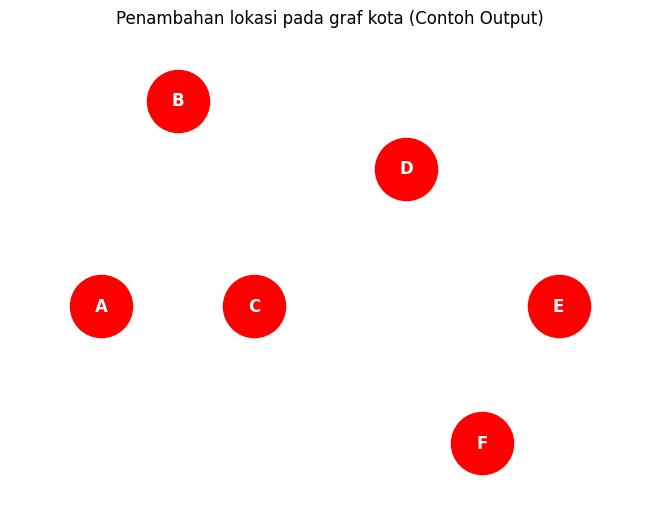

In [5]:
# List daftar nama titik di dalam kota
nodes = ['A', 'B', 'C', 'D', 'E', 'F']

# Tambahkan node dari list variabel `nodes` pada graf kota
kota.add_nodes_from(nodes)
# Tampilkan graf kota setelah penambahan node
show_graph(kota, pos=pos, title="Penambahan lokasi pada graf kota (Contoh Output)")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/1_addnodekota.png)

**c.** Pada graf kota, setiap edge mewakili hubungan antara dua lokasi, dan masing-masing hubungan memiliki jarak tempuh tertentu yang direpresentasikan sebagai `weight` pada graf. Berikut ini adalah jarak lokasi antara titik yang ada di kota tersebut:

- `A` ke `B`: 4 km.
- `A` ke `C`: 2 km.
- `B` ke `C`: 5 km.
- `B` ke `D`: 3 km.
- `C` ke `E`: 8 km.
- `D` ke `E`: 2 km.
- `D` ke `F`: 6 km.
- `E` ke `F`: 3 km.

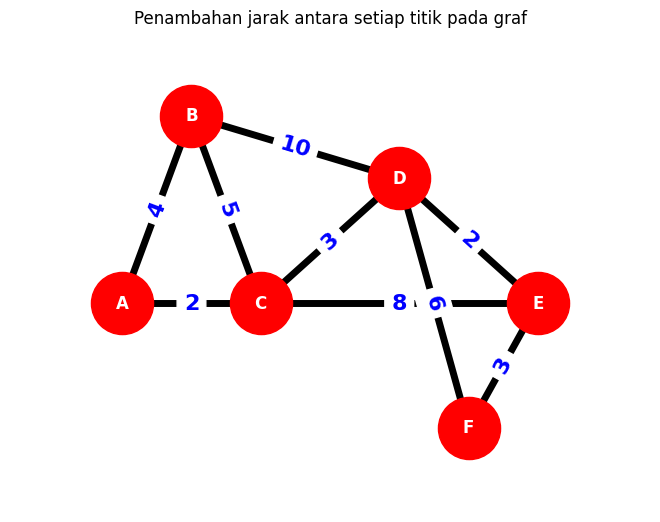

In [6]:
# Daftar jarak antara dua titik pada kota
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'D', 3),
    ('C', 'E', 8),
    ('D', 'E', 2),
    ('D', 'F', 6),
    ('E', 'F', 3)
]
# Tambahkan jarak yang menghubungkan antara dua titik ke dalam graf kota
kota.add_weighted_edges_from(edges)

# Tampilkan graf kota setelah penambahan edge
show_graph(kota, pos=pos, title='Penambahan jarak antara setiap titik pada graf')

Contoh *output*:

![Contoh output penambahan lokasi](./asset/2_addedgekota.png)

**d.** Pada potongan kode dibawah, buat fungsi `heuristable(a, b)`. Karena UCS tidak memperhatikan nilai heuristik, maka cukup kembalikan 0.

In [7]:
def heuristable(a, b) :
    return 0;

**e.** Pada potongan kode dibawah, buat kode untuk menemukan rute terpendek dengan mempertimbangkan jarak total antara lokasi awal dan lokasi tujuan yang dimasukkan oleh pengguna. 

Dalam proses pencarian rute, gunakan algoritma *Uniform Cost Search (UCS)* yang diimplementasikan menggunakan `astar_path()` pada NetworkX dengan nilai heuristik 0 yang sudah didefinisikan pada fungsi `heuristable()`.

Kemudian tampilkan rute terpendek yang sudah dicari antara titik awal dan titik tujuan yang sudah dimasukkan oleh user serta tampilkan juga besar jarak yang ditempuh dari titik awal ke titik tujuan tersebut.

In [27]:
# Minta input dari pengguna untuk titik awal dan titik tujuan
start_node = input("Masukkan titik awal: ")
end_node = input("Masukkan titik tujuan: ")

# Mencari titik yang dikunjungi dari titik awal ke titik tujuan
path = nx.astar_path(
    kota, 
    start_node, 
    end_node, 
    heuristic=heuristable, 
    weight='weight'
)

# Menghitung jarak dari titik awal ke titik tujuan
path_length =  nx.astar_path_length(
    kota, start_node, end_node, heuristic=heuristable, weight='weight'
)

# Cetak hasil
print(f"Titik yang dikunjungi dari {start_node} ke {end_node}: {path}")
print(f"Besar weight terkecil dari {start_node} ke {end_node}: {path_length} km")

Titik yang dikunjungi dari B ke F: ['B', 'C', 'D', 'E', 'F']
Besar weight terkecil dari B ke F: 13 km


Contoh *output*:

|input|output|
|-----|------|
|Masukkan titik awal: `B`<br>Masukkan titik tujuan: `F`|Titik yang dikunjungi dari B ke F: ['B', 'C', 'D', 'E', 'F']<br>Besar weight terkecil dari B ke F: 13 km|
|Masukkan titik awal: `A`<br>Masukkan titik tujuan: `D`|Titik yang dikunjungi dari A ke D: ['A', 'C', 'D']<br>Besar weight terkecil dari A ke D: 5 km|

### 2. Implementasi UCS pada *Weighted Directed Graph* (Bobot Nilai: `nn`)

Seorang detektif sedang menyelidiki jaringan kejahatan di sebuah kota besar. Detektif tersebut menemukan peta yang berisi rute rahasia yang menghubungkan beberapa lokasi markas jaringan kriminal yang menyembunyikan tempat penyimpanan barang ilegal. Namun, rute rahasia ini hanya bisa dilewati satu arah saja.

Bantu detektif mencari rute terpendek dari suatu lokasi ke lokasi lainnya dengan membuat graf pada NetworkX dan implementasikan algoritma *Uniform Cost Search (UCS)* untuk mencari rute yang dilalui dan menghitung jarak antara dua titik tersebut.

### Import *Library* NetworkX dan Matplotlib

*Library* Matplotlib digunakan untuk membantu menampilkan visualisasi graf pada terminal.

In [9]:
import networkx as nx # Library untuk membuat graf
import matplotlib.pyplot as plt # Library untuk membuat plot grafik

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [10]:
pos = {
    'NullPointer': (0, 0),
    'RootAccess': (1, 5),
    'DataBreach': (2, 0),
    'SyntaxError': (4, 4), 
    'BinaryBlasters': (6, 0),
    'CyberPatrol': (5, -3)
}

In [11]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=3000,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold",
      font_size=7,
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()        # Menampilkan graf menggunakan matplotlib

**a.** Inisialisasi graf bernama "peta_rahasia" menggunakan **graf berarah** untuk menunjukkan arah jalan rahasia antar markas jaringan kriminal

In [22]:
# Inisialisasi graf berarah
peta_rahasia.add_edge('A', 'B', weight=3)

**b.** Pada peta, terdapat beberapa nama jaringan kriminal yang terlibat, nama jaringan kriminal adalah `NullPointer`, `RootAccess`, `DataBreach`, `SyntaxError`, `BinaryBlasters`, dan `CyberPatrol`. Tambahkan nama-nama jaringan kriminal yang terlibat tersebut ke dalam graf `peta_rahasia`.

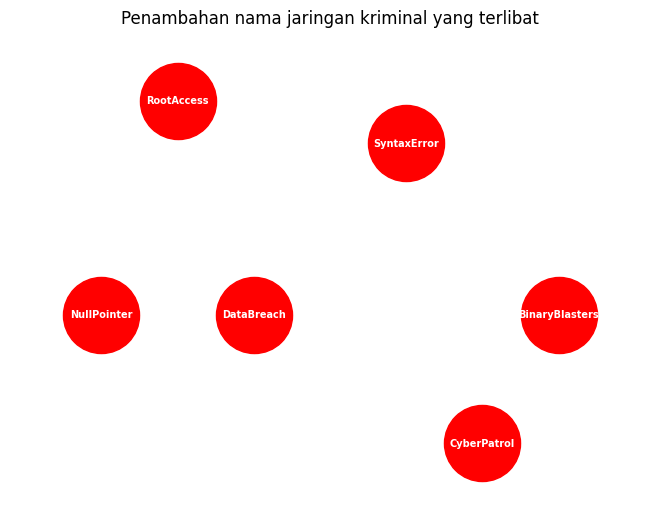

In [14]:
# List nama sindikat gang yang terlibat
nodes = ['NullPointer', 'RootAccess', 'DataBreach', 'SyntaxError', 'BinaryBlasters', 'CyberPatrol']
# Tambahkan node dari daftar sindikat gang yang terlibat
peta_rahasia.add_nodes_from(nodes)

# Tampilkan graf peta_rahasia setelah penambahan node
show_graph(peta_rahasia, pos=pos, title='Penambahan nama jaringan kriminal yang terlibat')

Contoh *output*:

![Contoh output penambahan lokasi](./asset/3_addnodepeta.png)

**c.** Berikut adalah jarak dari setiap rute yang terdapat pada peta rahasia:
- `NullPointer` ke `RootAccess` memiliki rute sepanjang 6 km.
- `NullPointer` ke `DataBreach` memiliki rute sepanjang 3 km.
- `RootAccess` ke `SyntaxError` memiliki rute sepanjang 2 km.
- `DataBreach` ke `SyntaxError` memiliki rute sepanjang 7 km.
- `SyntaxError` ke `BinaryBlasters` memiliki rute sepanjang 4 km.
- `BinaryBlasters` ke `CyberPatrol` memiliki rute sepanjang 5 km.
- `RootAccess` ke `BinaryBlasters` memiliki rute sepanjang 8km.
- `DataBerach` ke `CyberPatrol` memiliki rute sepanjang 9 km.

Tambahkan data rute tersebut ke dalam graf `peta_rahasia`.

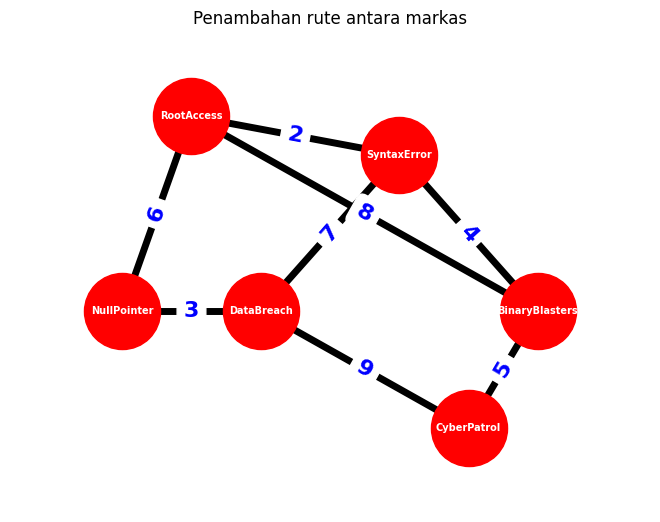

In [15]:
# List jarak suatu markat sindikat ke markas sindikat lainnya
edges = [
    ('NullPointer', 'RootAccess', 6), 
    ('NullPointer', 'DataBreach', 3), 
    ('RootAccess', 'SyntaxError', 2), 
    ('DataBreach', 'SyntaxError', 7), 
    ('SyntaxError', 'BinaryBlasters', 4), 
    ('BinaryBlasters', 'CyberPatrol', 5), 
    ('RootAccess', 'BinaryBlasters', 8), 
    ('DataBreach', 'CyberPatrol', 9)
]

# Tambahkan informasi jarak markas para sindikat sebagai edge
peta_rahasia.add_weighted_edges_from(edges)

# Cetak graf
show_graph(peta_rahasia, pos=pos, title="Penambahan rute antara markas")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/4_addedgepeta.png)

**d.** Buat sebuah program yang memanfaatkan graf `peta_rahasia` untuk mencetak setiap markas dan markas lainnya yang terhubung dengan markas tersebut.

In [23]:
print("Koneksi setiap markas")

# Iterasi untuk setiap node (markas) yang ada di graf `peta_rahasia`
for node in peta_rahasia.nodes() :
    # Ambil semua node yang terhubung dengan node saat ini
    children = list(peta_rahasia.neighbors(node))

    # Jika markas terhubung dengan markas lainnya, tampilkan daftarnya
    if children :
        # Tampilkan nama markas beserta daftar terhubung ke markas lainnya
        print(f"- {node} terhubung dengan: {children}")

Koneksi setiap markas
- NullPointer terhubung dengan: ['RootAccess', 'DataBreach']
- RootAccess terhubung dengan: ['NullPointer', 'SyntaxError', 'BinaryBlasters']
- DataBreach terhubung dengan: ['NullPointer', 'SyntaxError', 'CyberPatrol']
- SyntaxError terhubung dengan: ['RootAccess', 'DataBreach', 'BinaryBlasters']
- BinaryBlasters terhubung dengan: ['SyntaxError', 'CyberPatrol', 'RootAccess']
- CyberPatrol terhubung dengan: ['BinaryBlasters', 'DataBreach']
- A terhubung dengan: ['B']
- B terhubung dengan: ['A']


Contoh *output*:

```
Koneksi setiap markas
- NullPointer terhubung dengan: ['RootAccess', 'DataBreach']
- RootAccess terhubung dengan: ['SyntaxError', 'BinaryBlasters']
- DataBreach terhubung dengan: ['SyntaxError', 'CyberPatrol']
- SyntaxError terhubung dengan: ['BinaryBlasters']
- BinaryBlasters terhubung dengan: ['CyberPatrol']
```

**e.** Pada potongan kode dibawah, buat fungsi `heuristable(a, b)`. Karena UCS tidak memperhatikan nilai heuristik, maka cukup kembalikan 0.

In [16]:
def heuristable(a, b) :
    return 0; # Kembalikan nilai 0

**f.** Pada potongan kode dibawah, buat kode untuk menemukan rute terpendek antara dua markas dengan mempertimbangkan jarak total antara lokasi awal dan lokasi tujuan yang dimasukkan oleh pengguna. 

Dalam proses pencarian rute, gunakan algoritma *Uniform Cost Search (UCS)* yang diimplementasikan menggunakan `astar_path()` pada NetworkX dengan nilai heuristik 0 yang sudah didefinisikan pada fungsi `heuristable()`.

Kemudian tampilkan rute terpendek yang sudah dicari antara titik awal dan titik tujuan yang sudah dimasukkan oleh user serta tampilkan juga besar jarak yang ditempuh dari titik awal ke titik tujuan tersebut.

In [26]:
# Minta input dari pengguna untuk titik awal dan titik tujuan
start_node = input("Masukkan titik awal: ")
end_node = input("Masukkan titik tujuan: ")

# Mencari titik yang dikunjungi dari titik awal ke titik tujuan
path = nx.astar_path(
    peta_rahasia, 
    start_node, 
    end_node, 
    heuristic=heuristable, 
    weight='weight'
)

# Menghitung jarak dari titik awal ke titik tujuan
path_length = nx.astar_path_length(
    peta_rahasia, start_node, end_node, heuristic=heuristable, weight='weight'
)

# Cetak hasil
print(f"Titik yang dikunjungi dari {start_node} ke {end_node}: {path}")
print(f"Besar weight terkecil dari {start_node} ke {end_node}: {path_length} km")

Titik yang dikunjungi dari RootAccess ke BinaryBlasters: ['RootAccess', 'SyntaxError', 'BinaryBlasters']
Besar weight terkecil dari RootAccess ke BinaryBlasters: 6 km


Contoh *output*:

|input|output|
|-----|------|
|Masukkan titik awal: `RootAccess`<br>Masukkan titik tujuan: `BinaryBlasters`|Titik yang dikunjungi dari RootAccess ke BinaryBlasters: ['RootAccess', 'SyntaxError', 'BinaryBlasters']<br>Besar weight terkecil dari RootAccess ke BinaryBlasters: 6 km|
|Masukkan titik awal: `NullPointer`<br>Masukkan titik tujuan: `CyberPatrol`|Titik yang dikunjungi dari NullPointer ke CyberPatrol: ['NullPointer', 'DataBreach', 'CyberPatrol']<br>Besar weight terkecil dari NullPointer ke CyberPatrol: 12 km|

### 3. Soal Mandiri (Bobot Nilai: `nn`)

Seorang insinyur jaringan sedang memetakan infrastruktur jaringan komputer di sebuah perusahaan besar. Infrastruktur ini direpresentasikan sebagai sebuah *tree*, di mana setiap node mewakili perangkat jaringan seperti `Server (S)`, `Router (R)`, `Switch (S)`, dan `Computer (C)`. Hubungan antara node menunjukkan koneksi fisik antar perangkat tersebut.

Setiap koneksi memiliki bobot yang merepresentasikan *latency* dalam milidetik (ms) antara perangkat-perangkat tersebut. Bantu insinyur untuk menghitung latensi dari suatu perangkat ke perangkat lain dengan menggunakan algoritma *Uniform Cost Search* untuk menemukan rute dengan total latensi terendah pada jaringan komputer perusahaan yang direpresentasikan sebagai *tree*.

Kemudian, buat program yang dapat menghitung *latency* dari perangkat sumber ke perangkat tujuan. Minta nilai perangkat sumber dan perangkat tujuan dari *input user*.

Berikut adalah nama perangkat yang terdapat dalam jaringan. Buat kode-perangkat sebagai nama node.
|Nama|Kode-Perangkat|
|----|--------------|
|Server Utama|S|
|Router-A|R-A|
|Router-B|R-B|
|Switch-A1|Sw-A1|
|Switch-A2|Sw-A2|
|Switch-B|Sw-B|
|Computer-A1|C-A1|
|Computer-A2|C-A2|
|Computer-B1|C-B1|
|Computer-B2|C-B2|

Berikut adalah latency koneksi antara device dalam satuan milidetik (ms)
|Sumber|Tujuan|*Latency*|
|------|------|---------|
|S|R-A|5ms|
|S|R-B|3ms|
|R-A|Sw-A1|2ms|
|R-A|Sw-A2|4ms|
|R-B|Sw-B|6ms|
|Sw-A1|C-A1|3ms|
|Sw-A2|C-A2|7ms|
|Sw-B1|C-B1|5ms|
|Sw-B1|C-B2|2ms|

Instruksi:
- Buatlah sebuah *tree* yang merepresentasikan jaringan komputer di perusahan tersebut menggunakan NetworkX dengan jenis graf tidak berarah.
- Tampilkan *tree* yang sudah dibuat dengan `show_graph()`.
- Minta input pengguna untuk `perangkat sumber` dan `perangkat tujuan` yang akan ditelusuri.
- Implementasikan algoritma UCS dengan menggunakan `astar_path()` dengan nilai heuristik 0.
- Tampilkan rute yang dilalui dari perangkat sumber ke perangkat tujuan beserta *latency*nya

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [28]:
# Import library yang dibutuhkan
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
# Posisi setiap node dalam tree
pos = {
    'S': (0, 4),
    'R-A': (-2, 2),
    'R-B': (2, 2),
    'Sw-A1': (-3, 0),
    'Sw-A2': (-1, 0),
    'Sw-B1': (2, 0),
    'C-A1': (-3, -2),
    'C-A2': (-1, -2),
    'C-B1': (1, -2),
    'C-B2': (3, -2)
}


In [30]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=2000,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold", # Ketebalan font label node
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()  

**Kerjakan soal mandiri pada blok kode dibawah**

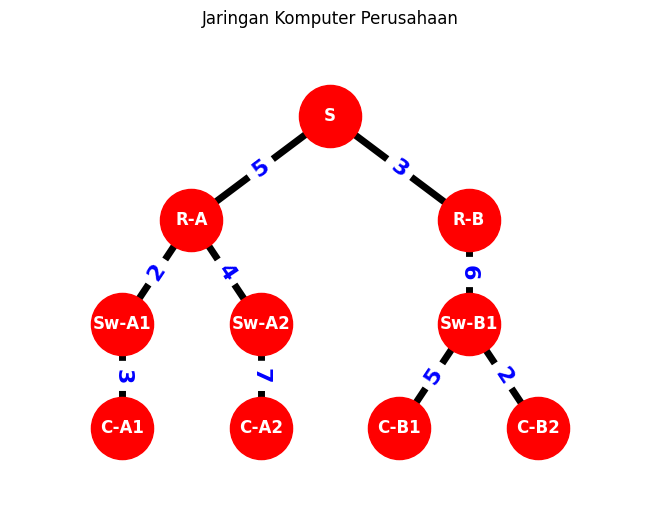

Rute yang dilalui dari S ke C-B1: ['S', 'R-B', 'Sw-B1', 'C-B1']
Total latency dari S ke C-B1: 14 ms


In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf tidak berarah (undirected graph)
G = nx.Graph()

# Menambahkan node dan edge dengan latency
G.add_edge('S', 'R-A', weight=5)
G.add_edge('S', 'R-B', weight=3)
G.add_edge('R-A', 'Sw-A1', weight=2)
G.add_edge('R-A', 'Sw-A2', weight=4)
G.add_edge('R-B', 'Sw-B1', weight=6)
G.add_edge('Sw-A1', 'C-A1', weight=3)
G.add_edge('Sw-A2', 'C-A2', weight=7)
G.add_edge('Sw-B1', 'C-B1', weight=5)
G.add_edge('Sw-B1', 'C-B2', weight=2)

# Posisi setiap node dalam tree untuk visualisasi
pos = {
    'S': (0, 4),
    'R-A': (-2, 2),
    'R-B': (2, 2),
    'Sw-A1': (-3, 0),
    'Sw-A2': (-1, 0),
    'Sw-B1': (2, 0),
    'C-A1': (-3, -2),
    'C-A2': (-1, -2),
    'C-B1': (1, -2),
    'C-B2': (3, -2)
}


# Fungsi untuk mencari jalur menggunakan UCS (Uniform Cost Search) dengan A*
def ucs_path(G, start, end):
    # Menggunakan A* dengan heuristic 0 (tidak ada heuristik)
    path = nx.astar_path(G, start, end, weight='weight', heuristic=lambda n1, n2: 0)
    path_length = nx.astar_path_length(G, start, end, weight='weight', heuristic=lambda n1, n2: 0)
    return path, path_length

# Menampilkan graf jaringan
show_graph(G, pos, title='Jaringan Komputer Perusahaan')

# Minta input dari pengguna untuk titik sumber dan tujuan
start_node = input("Masukkan perangkat sumber (contoh: S, R-A, Sw-A1, C-A1): ")
end_node = input("Masukkan perangkat tujuan (contoh: S, R-A, Sw-A1, C-A1): ")

# Mencari rute menggunakan UCS
path, path_length = ucs_path(G, start_node, end_node)

# Menampilkan hasil
print(f"Rute yang dilalui dari {start_node} ke {end_node}: {path}")
print(f"Total latency dari {start_node} ke {end_node}: {path_length} ms")


Contoh *output*:

![Contoh Graf Network](./asset/5_grafnetwork.png)

|Input|Output|
|-----|------|
|Masukkan titik awal: `S`<br>Masukkan titik tujuan: `C-B1`|Perangkat yang dikunjungi dari S ke C-B1: ['S', 'R-B', 'Sw-B1', 'C-B1']<br>Besar latency dari S ke C-B1: 14ms|